In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

figuredir = '../../figures'
if not os.path.exists(figuredir):
    os.mkdir(figuredir)

In [2]:
association_var_and_haplotype = pd.read_csv('../../data/tmp/LARGE/LARGE_Haplotype_Associated_Variants_Dprime_R.tsv', sep='\t', index_col=0)
#association_var_and_haplotype['origid'] = association_var_and_haplotype.index
print(association_var_and_haplotype.shape)
#association_var_and_haplotype.index = [('%s:%s[b37]%s,%s' % tuple(x.split(':'))) for x in association_var_and_haplotype.index]
association_var_and_haplotype.head()

(1935, 3)


,Dprime,R,ID
"22:33870673[b37]C,G",0.490297,-0.205172,rs4821151
"22:33871533[b37]C,T",0.611067,-0.081961,rs5754571
"22:33872261[b37]T,C",0.444591,-0.099465,rs5998957
"22:33872468[b37]A,G",0.404796,-0.222312,rs2032475
"22:33872572[b37]T,C",0.438635,-0.096272,rs5998958


In [13]:
! ls ../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/imputed_gwas/SAIGE.22.results.ForLARGEPlot.Geno_1e-1.txt

../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/imputed_gwas/SAIGE.22.results.ForLARGEPlot.Geno_1e-1.txt


In [14]:
ngbase = '../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/results/imputed_gwas/SAIGE.22.results.ForLARGEPlot.Geno_1e-1.txt'
ngres = pd.read_csv(ngbase, sep='\t') 
ngres['CHR'] = ngres['MarkerID'].apply(lambda x: x.split(':')[0])
ngres['POS'] = ngres['MarkerID'].apply(lambda x: x.split(':')[1].split('[')[0]).astype(int)
ngres.index = ngres['MarkerID']
ind = (ngres['POS'] >= 33600000) & (ngres['POS'] <= 34500000) & (ngres['CHR']=='22')
ngres = ngres.loc[ind, :]
ngres['logP'] = ngres['p.value'].apply(np.log10)*-1
ngres['Direction'] = ngres['BETA'].apply(np.sign)
ngres['Signed_logP'] = ngres['Direction'] * ngres['logP']
ngres = pd.merge(left=ngres, right=association_var_and_haplotype, left_index=True, right_index=True, how='left')
ngres['Rabs']= ngres['R'].abs()

ngres.head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_case_het,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:33600759[b37]T,C",22,33600759,"22:33600759[b37]T,C",T,C,1167.00,0.365144,0,-0.175503,0.138464,...,189,167,540,0.688295,-1.0,-0.688295,NaN,NaN,NaN,NaN
"22:33600991[b37]G,A",22,33600991,"22:33600991[b37]G,A",G,A,128.05,0.040066,0,0.240885,0.345348,...,38,2,86,0.313827,1.0,0.313827,NaN,NaN,NaN,NaN
"22:33601081[b37]C,T",22,33601081,"22:33601081[b37]C,T",C,T,114.00,0.035670,0,-0.075460,0.371296,...,30,2,78,0.076263,-1.0,-0.076263,NaN,NaN,NaN,NaN
"22:33601453[b37]A,G",22,33601453,"22:33601453[b37]A,G",A,G,36.10,0.011295,0,-0.648033,0.657329,...,8,0,29,0.489183,-1.0,-0.489183,NaN,NaN,NaN,NaN
"22:33602237[b37]C,T",22,33602237,"22:33602237[b37]C,T",C,T,687.25,0.215034,0,0.047397,0.161588,...,134,55,400,0.113917,1.0,0.113917,NaN,NaN,NaN,NaN


In [15]:
ngres.loc['22:34227108[b37]C,T', :]

CHR                             22
POS                       34227108
MarkerID       22:34227108[b37]C,T
Allele1                          C
Allele2                          T
AC_Allele2                 1106.85
AF_Allele2                0.346324
MissingRate                      0
BETA                    -0.0816241
SE                        0.138243
Tstat                       -4.271
var                        52.3252
p.value                   0.554898
p.value.NA                0.554898
Is.SPA                       False
AF_case                   0.334428
AF_ctrl                   0.350442
N_case                         411
N_ctrl                        1187
N_case_hom                      59
N_case_het                     154
N_ctrl_hom                     145
N_ctrl_het                     542
logP                      0.255787
Direction                       -1
Signed_logP              -0.255787
Dprime                    0.875707
R                         0.633005
ID                  

In [16]:
overlap = list(set(association_var_and_haplotype.index).intersection(set(ngres.index)))
ngres['Dprime'] = np.nan
ngres['R'] = np.nan
ngres.loc[overlap, 'Dprime'] = association_var_and_haplotype.loc[overlap, 'Dprime']
ngres.loc[overlap, 'R'] = association_var_and_haplotype.loc[overlap, 'R']
ngres['Rabs']= ngres['R'].abs()
ngres.sort_values(by='Rabs', ascending=True).head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_case_het,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34351707[b37]A,C",22,34351707,"22:34351707[b37]A,C",A,C,165.10,0.051658,0,-0.305478,0.316874,...,32,4,123,0.474919,-1.0,-0.474919,0.000439,-0.000054,rs112557493,0.000054
"22:34355342[b37]A,C",22,34355342,"22:34355342[b37]A,C",A,C,3032.50,0.948842,0,0.292773,0.321105,...,32,1061,122,0.441420,1.0,0.441420,0.000208,-0.000094,rs627417,0.000094
"22:34463940[b37]A,C",22,34463940,"22:34463940[b37]A,C",A,C,245.20,0.076721,0,-0.179779,0.249580,...,60,8,165,0.326679,-1.0,-0.326679,0.005461,-0.000857,rs11912158,0.000857
"22:33936965[b37]A,T",22,33936965,"22:33936965[b37]A,T",A,T,311.20,0.097372,0,0.313108,0.236205,...,75,6,212,0.732879,1.0,0.732879,0.001631,0.001037,rs59666206,0.001037
"22:34105972[b37]A,C",22,34105972,"22:34105972[b37]A,C",A,C,248.35,0.077707,0,0.116956,0.258510,...,79,6,176,0.186443,1.0,0.186443,0.002682,0.001528,.,0.001528


In [17]:
ngres['R_signed'] = ngres['R']*ngres['Direction']*-1

In [18]:
ind = ngres['MarkerID'].apply(lambda x: '34227108' in x)
ngres.loc[ind, :]

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34227108[b37]C,T",22,34227108,"22:34227108[b37]C,T",C,T,1106.85,0.346324,0,-0.081624,0.138243,...,145,542,0.255787,-1.0,-0.255787,0.875707,0.633005,rs738948,0.633005,0.633005


In [19]:

ind = ngres['MarkerID'].apply(lambda x: '34220707' in x)
ngres.loc[ind, :]

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34220707[b37]A,G",22,34220707,"22:34220707[b37]A,G",A,G,1217.65,0.380992,0,-0.206389,0.133669,...,185,538,0.911575,-1.0,-0.911575,0.95568,0.678799,rs16993101,0.678799,0.678799


In [20]:
ngres.loc[ngres['ID'].isin(['rs738948', 'rs16993101', 'rs738949', 'rs58484073', 'rs9607079']), ['MarkerID', 'ID']]

,MarkerID,ID
MarkerID,,
"22:34220707[b37]A,G","22:34220707[b37]A,G",rs16993101
"22:34226582[b37]G,A","22:34226582[b37]G,A",rs9607079
"22:34227108[b37]C,T","22:34227108[b37]C,T",rs738948
"22:34230571[b37]A,G","22:34230571[b37]A,G",rs58484073
"22:34238465[b37]G,C","22:34238465[b37]G,C",rs738949


In [21]:
ngres.loc[ngres['Rabs']>.4, :].sort_values(by='p.value').head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34225359[b37]G,A",22,34225359,"22:34225359[b37]G,A",G,A,1374.65,0.430116,0,-0.344580,0.151463,...,223,581,1.941104,-1.0,-1.941104,0.918078,0.573836,rs12053767,0.573836,0.573836
"22:34191318[b37]A,C",22,34191318,"22:34191318[b37]A,C",A,C,1313.30,0.410920,0,-0.291643,0.154100,...,219,547,1.534498,-1.0,-1.534498,0.953057,0.626060,rs5999104,0.626060,0.626060
"22:34126617[b37]T,C",22,34126617,"22:34126617[b37]T,C",T,C,1460.70,0.457040,0,-0.286772,0.160364,...,251,594,1.433360,-1.0,-1.433360,0.781398,0.448767,rs9621759,0.448767,0.448767
"22:34219939[b37]A,G",22,34219939,"22:34219939[b37]A,G",A,G,1749.00,0.547247,0,0.273827,0.154751,...,362,565,1.415579,1.0,1.415579,0.972529,-0.550546,rs2267296,0.550546,0.550546
"22:34134093[b37]G,A",22,34134093,"22:34134093[b37]G,A",G,A,1092.80,0.341927,0,-0.272904,0.168953,...,148,532,1.274688,-1.0,-1.274688,0.735479,0.530471,rs5994792,0.530471,0.530471


In [22]:
for v in ['22:34225359[b37]G,A', '22:34220707[b37]A,G', '22:34227108[b37]C,T', '22:34230571[b37]A,G']:
    print(v, v in ngres.index)

22:34225359[b37]G,A True
22:34220707[b37]A,G True
22:34227108[b37]C,T True
22:34230571[b37]A,G True


In [23]:
ngres.loc[ngres['ID']=='rs738948', :]

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34227108[b37]C,T",22,34227108,"22:34227108[b37]C,T",C,T,1106.85,0.346324,0,-0.081624,0.138243,...,145,542,0.255787,-1.0,-0.255787,0.875707,0.633005,rs738948,0.633005,0.633005


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Use the colorbar set_ticks() method instead.


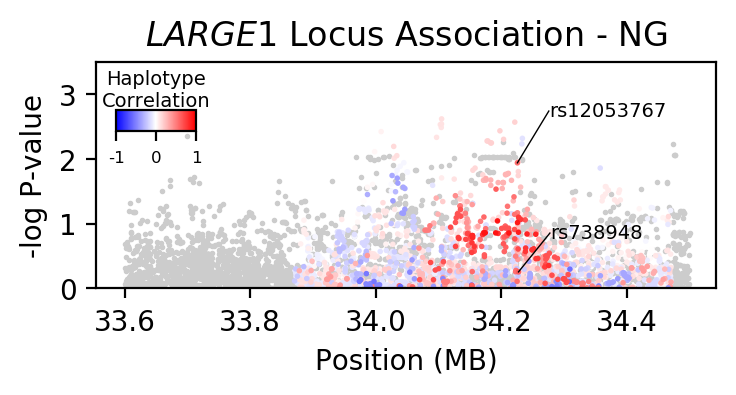

In [66]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,1.5), dpi=200)

    ind = ~ngres.loc[:, 'R'].isnull()
    Z = ngres.copy().sort_values(by='Rabs', ascending=True)
    
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R_signed'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position (MB)')
    ax.set_ylabel('-log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([0,3.5])
    ax.set_title('$\it{LARGE1}$ Locus Association - NG')

    xlim = (33500000, 34540000)
    #ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cbar_ax = fig.add_axes([.15,.65, .1, .07])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_title('Haplotype\nCorrelation', fontsize=7, pad=.2)
    cbar_ax.set_xticks([-1, 0,1])
    cbar_ax.set_xticklabels([-1, 0,1], fontsize=6)
    
    labfs=7

    for v in ['22:34227108[b37]C,T']:
        ax.text(x=Z.loc[v, 'POS'] + 50000,
            y=Z.loc[v, 'logP']+.6,
            s=Z.loc[v, 'ID'],
           ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 50000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.6], color='k', linewidth=.5)

    
    for v in ['22:34225359[b37]G,A']: #, '22:34220707[b37]A,G']:
        ax.text(x=Z.loc[v, 'POS'] + 50000,
            y=Z.loc[v, 'logP']+.8,
            s=Z.loc[v, 'ID'],
           ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 50000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.8], color='k', linewidth=.5)
    
    '''
    for v in ['22:34230571[b37]A,G']:
        ax.text(x=Z.loc[v, 'POS'] + 40000,
            y=Z.loc[v, 'logP']+1.3,
            s=Z.loc[v, 'ID'],
           ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 40000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+1.3], color='k', linewidth=.5)    

    '''
    
    ax.set_xlim((33.55475160571079e6, 34.541823394289196e6))


    #plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    plt.savefig('../../figures/LARGE_Variant_Association_%s.pdf' % 'NG', bbox_inches='tight')
    plt.savefig('../../figures/LARGE_Variant_Association_%s.png' % 'NG', bbox_inches='tight')

Text(0.24, 0.796, 'Haplotype\nCorrelation')

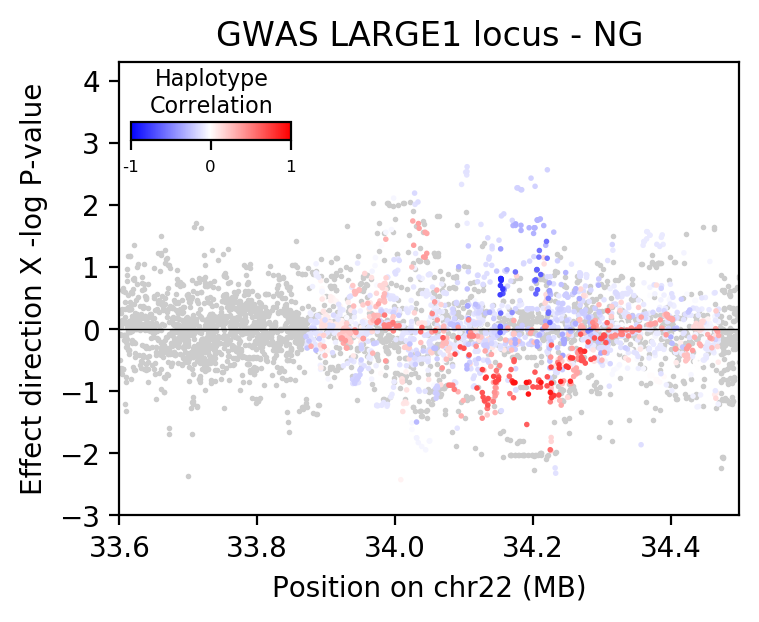

In [33]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,3), dpi=200)

    ind = ~ngres.loc[:, 'R'].isnull()
    Z = ngres.copy().sort_values(by='Rabs', ascending=True)
    
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'Signed_logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'Signed_logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position on chr22 (MB)')
    ax.set_ylabel('Effect direction X -log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([-3,4.3])
    ax.set_title('GWAS LARGE1 locus - %s' % 'NG')

    xlim = (33600000, 34500000)
    ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cb_ax = fig.add_axes([.139, .75, 0.2, 0.03])
    cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
    cb_ax.set_xticklabels([-1,0,1], fontsize=6)
    plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.pdf' % ng_pheno.split('_')[1], bbox_inches='tight')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.png' % ng_pheno.split('_')[1], bbox_inches='tight')

In [35]:
linkage_thresh = .85
ind = (ngres['R'].abs()>linkage_thresh)
display(ngres.loc[ind, :].sort_values(by='p.value').head())

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34193656[b37]T,G",22,34193656,"22:34193656[b37]T,G",T,G,759.60,0.237672,0,-0.255271,0.190783,...,79,416,1.043612,-1.0,-1.043612,0.921944,0.920313,rs59594190,0.920313,0.920313
"22:34225513[b37]G,A",22,34225513,"22:34225513[b37]G,A",G,A,756.95,0.236843,0,-0.254049,0.194732,...,81,412,1.017669,-1.0,-1.017669,0.906404,0.901082,rs73404896,0.901082,0.901082
"22:34227065[b37]C,T",22,34227065,"22:34227065[b37]C,T",C,T,692.35,0.216630,0,-0.233339,0.156240,...,72,390,0.868651,-1.0,-0.868651,0.921943,0.885872,rs73406608,0.885872,0.885872
"22:34174184[b37]T,C",22,34174184,"22:34174184[b37]T,C",T,C,721.95,0.225892,0,-0.225615,0.152152,...,70,407,0.859737,-1.0,-0.859737,0.954054,0.924667,rs16993014,0.924667,0.924667
"22:34190795[b37]T,C",22,34190795,"22:34190795[b37]T,C",T,C,721.95,0.225892,0,-0.225381,0.152177,...,70,406,0.858260,-1.0,-0.858260,0.952720,0.922242,rs4525791,0.922242,0.922242


In [38]:
linkage_thresh = .85

ind = (ngres['Dprime']>linkage_thresh)
display(ngres.loc[ind, :].sort_values(by='p.value').head())

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34221189[b37]T,C",22,34221189,"22:34221189[b37]T,C",T,C,359.05,0.112344,0,0.611412,0.219689,...,9,243,2.569889,1.0,2.569889,0.990961,-0.174824,rs73882307,0.174824,0.174824
"22:34197509[b37]T,A",22,34197509,"22:34197509[b37]T,A",T,A,352.70,0.110357,0,0.604253,0.225363,...,7,240,2.435631,1.0,2.435631,0.990908,-0.174250,rs73885519,0.174250,0.174250
"22:34203359[b37]T,C",22,34203359,"22:34203359[b37]T,C",T,C,350.80,0.109762,0,0.586486,0.227470,...,7,240,2.304132,1.0,2.304132,0.990873,-0.173867,rs73882303,0.173867,0.173867
"22:34178505[b37]C,T",22,34178505,"22:34178505[b37]C,T",C,T,351.10,0.109856,0,0.585447,0.228877,...,7,240,2.278598,1.0,2.278598,0.990801,-0.173098,rs666731,0.173098,0.173098
"22:34177108[b37]C,T",22,34177108,"22:34177108[b37]C,T",C,T,351.50,0.109981,0,0.585326,0.228849,...,7,240,2.278320,1.0,2.278320,0.990819,-0.173291,rs650191,0.173291,0.173291


In [39]:
linkage_thresh = .3

ind = (ngres['R'].abs()>linkage_thresh)
display(ngres.loc[ind, :].sort_values(by='p.value').head())

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34225359[b37]G,A",22,34225359,"22:34225359[b37]G,A",G,A,1374.65,0.430116,0,-0.344580,0.151463,...,223,581,1.941104,-1.0,-1.941104,0.918078,0.573836,rs12053767,0.573836,0.573836
"22:34025837[b37]A,G",22,34025837,"22:34025837[b37]A,G",A,G,1481.70,0.463611,0,0.323070,0.154043,...,247,589,1.745089,1.0,1.745089,0.578889,0.339206,rs5999041,0.339206,-0.339206
"22:34034101[b37]C,T",22,34034101,"22:34034101[b37]C,T",C,T,1360.00,0.425532,0,0.314825,0.152925,...,210,570,1.704169,1.0,1.704169,0.580563,0.369203,rs28656978,0.369203,-0.369203
"22:34175254[b37]G,A",22,34175254,"22:34175254[b37]G,A",G,A,992.50,0.310544,0,0.338504,0.164824,...,105,511,1.698949,1.0,1.698949,0.965411,-0.325878,rs427767,0.325878,0.325878
"22:34182877[b37]G,A",22,34182877,"22:34182877[b37]G,A",G,A,865.95,0.270948,0,0.347775,0.171209,...,81,469,1.675459,1.0,1.675459,0.974981,-0.301191,rs9609867,0.301191,0.301191


In [51]:
slbase = '../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/results/imputed_gwas/SAIGE.22.results.ForLARGEPlot.Geno_1e-1.txt'
slres = pd.read_csv(slbase, sep='\t') 
slres['CHR'] = slres['MarkerID'].apply(lambda x: x.split(':')[0])
slres['POS'] = slres['MarkerID'].apply(lambda x: x.split(':')[1].split('[')[0]).astype(int)
slres.index = slres['MarkerID']
ind = (slres['POS'] >= 33600000) & (slres['POS'] <= 34500000) & (slres['CHR']=='22')
slres = slres.loc[ind, :]
slres['logP'] = slres['p.value'].apply(np.log10)*-1
slres['Direction'] = slres['BETA'].apply(np.sign)
slres['Signed_logP'] = slres['Direction'] * slres['logP']
slres = pd.merge(left=slres, right=association_var_and_haplotype, left_index=True, right_index=True, how='left')
slres['Rabs']= slres['R'].abs()

slres.head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_case_het,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:33600759[b37]T,C",22,33600759,"22:33600759[b37]T,C",T,C,776.00,0.421281,0,-0.147657,0.163310,...,63,139,405,0.436618,-1.0,-0.436618,NaN,NaN,NaN,NaN
"22:33600991[b37]G,A",22,33600991,"22:33600991[b37]G,A",G,A,30.75,0.016694,0,-0.078339,0.726442,...,2,0,27,0.038995,-1.0,-0.038995,NaN,NaN,NaN,NaN
"22:33601081[b37]C,T",22,33601081,"22:33601081[b37]C,T",C,T,55.85,0.030320,0,-0.384275,0.494201,...,5,0,51,0.359693,-1.0,-0.359693,NaN,NaN,NaN,NaN
"22:33602001[b37]C,T",22,33602001,"22:33602001[b37]C,T",C,T,38.05,0.020657,0,-0.694087,0.581415,...,2,1,34,0.633464,-1.0,-0.633464,NaN,NaN,NaN,NaN
"22:33602237[b37]C,T",22,33602237,"22:33602237[b37]C,T",C,T,419.20,0.227579,0,-0.104901,0.185835,...,43,53,261,0.242283,-1.0,-0.242283,NaN,NaN,NaN,NaN


In [52]:
overlap = list(set(association_var_and_haplotype.index).intersection(set(slres.index)))
slres['Dprime'] = np.nan
slres['R'] = np.nan
slres.loc[overlap, 'Dprime'] = association_var_and_haplotype.loc[overlap, 'Dprime']
slres.loc[overlap, 'R'] = association_var_and_haplotype.loc[overlap, 'R']
slres['Rabs']= slres['R'].abs()
slres['R_signed'] = slres['R']*slres['Direction']*-1
slres.sort_values(by='Rabs', ascending=True).head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34351707[b37]A,C",22,34351707,"22:34351707[b37]A,C",A,C,100.30,0.054452,0,0.174542,0.378259,...,0,84,0.190787,1.0,0.190787,0.000439,-0.000054,rs112557493,0.000054,0.000054
"22:34355342[b37]A,C",22,34355342,"22:34355342[b37]A,C",A,C,1746.45,0.948127,0,-0.226699,0.389452,...,718,81,0.251424,-1.0,-0.251424,0.000208,-0.000094,rs627417,0.000094,-0.000094
"22:34463940[b37]A,C",22,34463940,"22:34463940[b37]A,C",A,C,175.05,0.095033,0,-0.228617,0.270092,...,5,145,0.400875,-1.0,-0.400875,0.005461,-0.000857,rs11912158,0.000857,-0.000857
"22:33936965[b37]A,T",22,33936965,"22:33936965[b37]A,T",A,T,187.95,0.102036,0,-0.053148,0.267342,...,10,140,0.074472,-1.0,-0.074472,0.001631,0.001037,rs59666206,0.001037,0.001037
"22:34105972[b37]A,C",22,34105972,"22:34105972[b37]A,C",A,C,125.95,0.068377,0,-0.775526,0.437192,...,7,102,1.419744,-1.0,-1.419744,0.002682,0.001528,.,0.001528,0.001528


In [53]:
slres.loc[slres['R_signed']>.5, :].sort_values(by='logP', ascending=False).head()

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34276269[b37]C,T",22,34276269,"22:34276269[b37]C,T",C,T,465.20,0.252552,0,-0.379184,0.218250,...,53,305,1.385525,-1.0,-1.385525,0.795421,0.668541,rs12106531,0.668541,0.668541
"22:34272284[b37]G,A",22,34272284,"22:34272284[b37]G,A",G,A,463.55,0.251656,0,-0.346740,0.217486,...,53,305,1.256224,-1.0,-1.256224,0.799115,0.670651,rs16993207,0.670651,0.670651
"22:34273307[b37]C,T",22,34273307,"22:34273307[b37]C,T",C,T,463.00,0.251357,0,-0.340645,0.218354,...,53,304,1.226409,-1.0,-1.226409,0.797772,0.669193,rs16993211,0.669193,0.669193
"22:34270665[b37]C,G",22,34270665,"22:34270665[b37]C,G",C,G,471.95,0.256216,0,-0.333847,0.220110,...,55,309,1.189313,-1.0,-1.189313,0.799632,0.666471,rs59667917,0.666471,0.666471
"22:34270477[b37]A,G",22,34270477,"22:34270477[b37]A,G",A,G,454.50,0.246743,0,-0.313557,0.227927,...,49,304,1.073355,-1.0,-1.073355,0.801840,0.689964,rs59198201,0.689964,0.689964


In [58]:
slres.loc[slres['ID']=='rs12053767', 'p.value']

MarkerID
22:34225359[b37]G,A    0.246575
Name: p.value, dtype: float64

In [59]:
ngres.loc[ngres['ID']=='rs12053767', 'p.value']

MarkerID
22:34225359[b37]G,A    0.011452
Name: p.value, dtype: float64

In [55]:
ngres.loc[ngres['ID']=='rs12053767', :]

,CHR,POS,MarkerID,Allele1,Allele2,AC_Allele2,AF_Allele2,MissingRate,BETA,SE,...,N_ctrl_hom,N_ctrl_het,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
MarkerID,,,,,,,,,,,,,,,,,,,,,
"22:34225359[b37]G,A",22,34225359,"22:34225359[b37]G,A",G,A,1374.65,0.430116,0,-0.34458,0.151463,...,223,581,1.941104,-1.0,-1.941104,0.918078,0.573836,rs12053767,0.573836,0.573836


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Use the colorbar set_ticks() method instead.


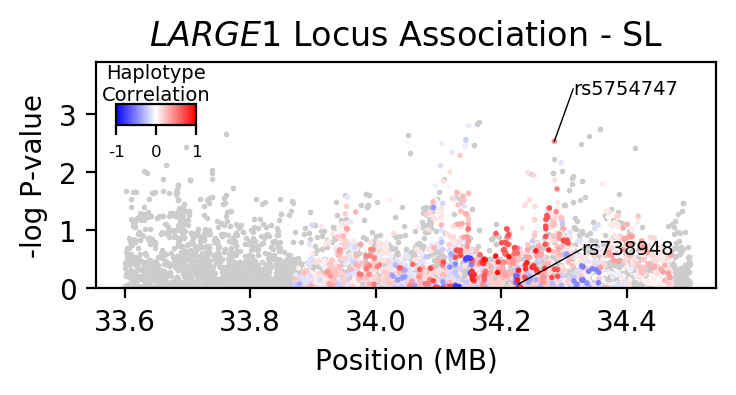

In [65]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,1.5), dpi=200)

    Z = slres.copy().sort_values(by='Rabs', ascending=True)
    Z.index = Z['ID']
    ind = ~Z.loc[:, 'R'].isnull()
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R_signed'], cmap='bwr', vmin=-1, vmax=1)

    ax.set_xlabel('Position (MB)')
    ax.set_ylabel('-log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([0,3.9])
    ax.set_title('$\it{LARGE1}$ Locus Association - SL')

    xlim = (33500000, 34540000)
    #ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cbar_ax = fig.add_axes([.15,.67, .1, .07])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_title('Haplotype\nCorrelation', fontsize=7, pad=.2)
    cbar_ax.set_xticks([-1, 0,1])
    cbar_ax.set_xticklabels([-1, 0,1], fontsize=6)

    
    for v in ['rs5754747']:
        ax.text(x=Z.loc[v, 'POS'] + 30000,
            y=Z.loc[v, 'logP']+.9,
            s=Z.loc[v, 'ID'],
            ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 30000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.9], color='k', linewidth=.5)
    
    for v in ['rs738948']:
        ax.text(x=Z.loc[v, 'POS'] + 100000,
            y=Z.loc[v, 'logP']+.6,
            s=Z.loc[v, 'ID'],
            ha='left', va='center', fontsize=labfs)

        ax.plot([Z.loc[v, 'POS'], Z.loc[v, 'POS'] + 100000],
               [Z.loc[v, 'logP'], Z.loc[v, 'logP']+.6], color='k', linewidth=.5)
    
    ax.set_xlim((33.55475160571079e6, 34.541823394289196e6))
    #plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    plt.savefig('../../figures/LARGE_Variant_Association_SL.pdf', bbox_inches='tight')
    plt.savefig('../../figures/LARGE_Variant_Association_SL.png', bbox_inches='tight')

In [206]:
ind

SNP
22:33600759[b37]T,C    False
22:33600991[b37]G,A    False
22:33601081[b37]C,T    False
22:33602001[b37]C,T    False
22:33602237[b37]C,T    False
                       ...  
22:34498986[b37]G,T    False
22:34499025[b37]G,A    False
22:34499157[b37]G,A    False
22:34499558[b37]A,C    False
22:34499871[b37]A,G    False
Name: R, Length: 4992, dtype: bool

In [201]:
ax.get_xlim()

(33500000.0, 34540000.0)

In [215]:
ngres.loc['22:34284173[b37]A,G', :]

SNP            22:34284173[b37]A,G
CHR                             22
POS                       34284173
REF                              A
ALT                              G
N                             1598
MISSRATE                         0
AF                        0.566333
SCORE                    -0.112491
VAR                        55.4488
PVAL                      0.987947
logP                    0.00526634
Direction                       -1
Signed_logP            -0.00526634
Dprime                    0.754336
R                        -0.457277
ID                       rs5754747
Rabs                      0.457277
R_signed                 -0.457277
Name: 22:34284173[b37]A,G, dtype: object

In [214]:
slres.loc[slres['Rabs']>.4, :].sort_values(by='PVAL').head()

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,
"22:34284173[b37]A,G","22:34284173[b37]A,G",22,34284173,A,G,921,0.000000,0.590119,18.332500,38.337832,0.003068,2.513075,1.0,0.005266,0.754336,-0.457277,rs5754747,0.457277,0.457277
"22:34288389[b37]A,G","22:34288389[b37]A,G",22,34288389,A,G,921,0.009772,0.375548,-14.249550,37.542373,0.020038,1.698137,-1.0,-0.037486,0.762108,0.488073,rs7285532,0.488073,0.488073
"22:34276269[b37]C,T","22:34276269[b37]C,T",22,34276269,C,T,921,0.036916,0.249718,-11.216428,30.404946,0.041937,1.377406,-1.0,-0.544414,0.795421,0.668541,rs12106531,0.668541,0.668541
"22:34091748[b37]A,C","22:34091748[b37]A,C",22,34091748,A,C,921,0.000000,0.416938,12.395973,37.300251,0.042390,1.372732,1.0,0.032217,0.690311,0.401901,rs2051564,0.401901,-0.401901
"22:34287077[b37]T,A","22:34287077[b37]T,A",22,34287077,T,A,921,0.021716,0.407880,-12.196284,38.459853,0.049225,1.307811,-1.0,-0.108515,0.755288,0.452869,rs16993252,0.452869,0.452869


Text(0.24, 0.796, 'Haplotype\nCorrelation')

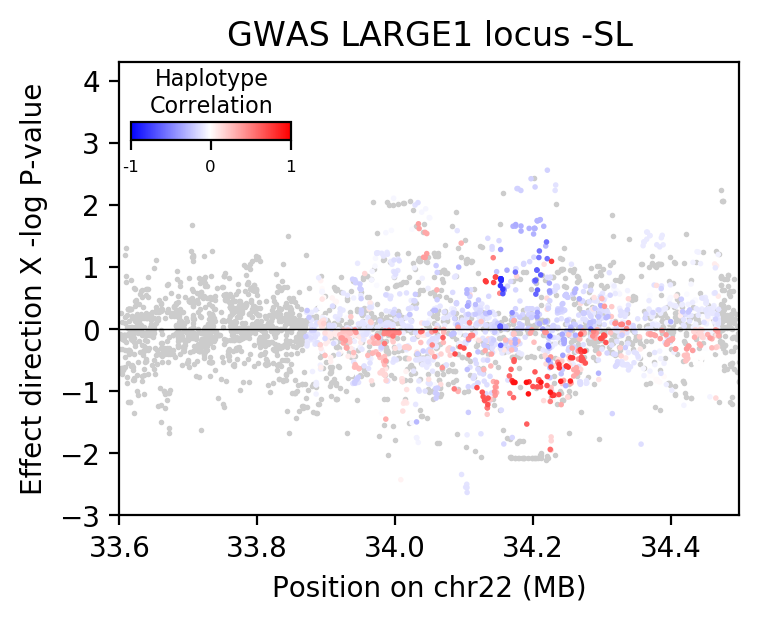

In [101]:
    (fig,ax) = plt.subplots(1,1, figsize=(4,3), dpi=200)

    ind = ~slres.loc[:, 'R'].isnull()
    Z = slres.copy().sort_values(by='Rabs', ascending=True)
    
    
    ax.scatter(Z.loc[~ind, 'POS'], Z.loc[~ind, 'Signed_logP'], s=1, zorder=0,
           color='0.8')
    im = ax.scatter(Z.loc[ind, 'POS'], Z.loc[ind, 'Signed_logP'], s=1, zorder=0,
           c=Z.loc[ind, 'R'], cmap='bwr',vmin=-1, vmax=1)

    ax.set_xlabel('Position on chr22 (MB)')
    ax.set_ylabel('Effect direction X -log P-value')

    ax.set_xticks([3.36e7, 3.38e7, 3.40e7, 3.42e7, 3.44e7])
    ax.set_xticklabels([33.6, 33.8, 34.0, 34.2, 34.4])
    ax.set_ylim([-3,4.3])
    ax.set_title('GWAS LARGE1 locus -SL')

    xlim = (33600000, 34500000)
    ax.hlines(y=0, xmin=xlim[0], xmax=xlim[1], linewidth=.5, zorder=1)
    ax.set_xlim(xlim)

    cb_ax = fig.add_axes([.139, .75, 0.2, 0.03])
    cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
    cb_ax.set_xticklabels([-1,0,1], fontsize=6)
    plt.figtext(.24,.796, 'Haplotype\nCorrelation', fontsize=8, ha='center')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.pdf' % ng_pheno.split('_')[1], bbox_inches='tight')
    #plt.savefig('../../figures/LARGE_Variant_Association_%s.png' % ng_pheno.split('_')[1], bbox_inches='tight')

In [105]:
slres.loc[slres['SNP'].apply(lambda x: '34227108' in x), :]

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Direction,Signed_logP,Dprime,R,ID,Rabs,R_signed
SNP,,,,,,,,,,,,,,,,,,,


In [111]:
pvar = pd.read_csv('../../data/tmp/GWAS/data/imputed/OmniH3Merged_PrePost2016_20220226.INFO_8e-1.Deduped.chr22.pvar', sep='\t', skiprows=16)

In [115]:
pvar.loc[pvar['POS']==34227108, :]

,#CHROM,POS,ID,REF,ALT,FILTER,INFO
106270,22,34227108,rs738948,C,T,PASS,RefPanelAF=0.362187;AN=11110;AC=3791;INFO=0.95...


In [14]:
linkage_thresh = .85
for p in ng_phenos:
    print(p)
    ind = ((ngres[p]['R']>linkage_thresh) & (ngres[p]['SCORE']<0)) | ((ngres[p]['R']<(-1*linkage_thresh)) & (ngres[p]['SCORE']>0))
    #ind = ((ngres[p]['Dprime']>linkage_thresh) & (ngres[p]['SCORE']<0)) | ((ngres[p]['Dprime']<(-1*linkage_thresh)) & (ngres[p]['SCORE']>0))
    display(ngres[p].loc[ind, :].sort_values(by='PVAL').head())

MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Signed_logP,Dprime,R,ID,Rabs
SNP,,,,,,,,,,,,,,,,,
"22:34193656[b37]T,G","22:34193656[b37]T,G",22,34193656,T,G,1598,0.008135,0.236909,-11.338562,44.889343,0.090582,1.042958,-1.042958,0.921944,0.920313,rs59594190,0.920313
"22:34225513[b37]G,A","22:34225513[b37]G,A",22,34225513,G,A,1598,0.011264,0.236076,-10.518830,43.706430,0.111589,0.952377,-0.952377,0.906404,0.901082,rs73404896,0.901082
"22:34254648[b37]G,A","22:34254648[b37]G,A",22,34254648,G,A,1598,0.018773,0.221620,-10.105238,41.088336,0.114916,0.939619,-0.939619,0.879132,0.855707,rs60848515,0.855707
"22:34172398[b37]A,C","22:34172398[b37]A,C",22,34172398,A,C,1598,0.013767,0.223668,-9.569000,43.031770,0.144642,0.839705,-0.839705,0.955252,0.925261,rs59015613,0.925261
"22:34174184[b37]T,C","22:34174184[b37]T,C",22,34174184,T,C,1598,0.012516,0.223701,-9.483464,42.929306,0.147784,0.830374,-0.830374,0.954054,0.924667,rs16993014,0.924667


MergeEpoch_SL_AgORSeqPos_Vs_PopControl


,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Signed_logP,Dprime,R,ID,Rabs
SNP,,,,,,,,,,,,,,,,,
"22:34254648[b37]G,A","22:34254648[b37]G,A",22,34254648,G,A,921,0.016287,0.167219,-6.015262,22.991191,0.209657,0.678491,-0.678491,0.879132,0.855707,rs60848515,0.855707
"22:34190795[b37]T,C","22:34190795[b37]T,C",22,34190795,T,C,921,0.009772,0.160636,-4.826809,21.081662,0.293142,0.532922,-0.532922,0.952720,0.922242,rs4525791,0.922242
"22:34211867[b37]C,T","22:34211867[b37]C,T",22,34211867,C,T,921,0.010858,0.161361,-4.804280,21.122651,0.295870,0.528900,-0.528900,0.950280,0.920445,rs8135517,0.920445
"22:34172398[b37]A,C","22:34172398[b37]A,C",22,34172398,A,C,921,0.010858,0.158617,-4.480508,20.954087,0.327680,0.484550,-0.484550,0.955252,0.925261,rs59015613,0.925261
"22:34174184[b37]T,C","22:34174184[b37]T,C",22,34174184,T,C,921,0.011944,0.158242,-4.376362,20.963873,0.339162,0.469593,-0.469593,0.954054,0.924667,rs16993014,0.924667


In [15]:
ng_phenos

['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl',
 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl']

In [16]:
haplodat = pd.read_csv('../../data/tmp/LARGE/vcf/2233870000_to_34470000.maf_1e-2.clean.txt', sep='\t', header=[0,1], index_col=0)
genotype = haplodat.groupby(axis=1, level=0).sum()
genotype.head()

,Fall2013_SM-29811,Fall2013_SM-29812,Fall2013_SM-29813,Fall2013_SM-29817,Fall2013_SM-2981D,Fall2013_SM-2981G,Fall2013_SM-2981I,Fall2013_SM-2981J,Fall2013_SM-2981K,Fall2013_SM-2981L,...,Winter2014_G3283.1,Winter2014_G3290-2.1,Winter2014_G3300-2.1,Winter2014_G3339.1,Winter2014_G3378.1,Winter2014_G3379.1,Winter2014_G3418-2.1,reGenotypedNov2013_SM-8750J_1,reGenotypedNov2013_SM-GRN85_1,reGenotypedNov2013_SM-LW4CG_1
"22:33870122[b37]A,G",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"22:33870673[b37]C,G",1,1,1,0,0,2,1,0,1,0,...,0,1,0,1,1,2,1,0,1,0
"22:33870905[b37]C,T",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"22:33871234[b37]C,T",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"22:33871410[b37]A,T",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ngres[p].sort_values(by='R', ascending=False).head()

,SNP,CHR,POS,REF,ALT,N,MISSRATE,AF,SCORE,VAR,PVAL,logP,Signed_logP,Dprime,R,ID,Rabs
SNP,,,,,,,,,,,,,,,,,
"22:34172398[b37]A,C","22:34172398[b37]A,C",22,34172398,A,C,921,0.010858,0.158617,-4.480508,20.954087,0.327680,0.484550,-0.484550,0.955252,0.925261,rs59015613,0.925261
"22:34174184[b37]T,C","22:34174184[b37]T,C",22,34174184,T,C,921,0.011944,0.158242,-4.376362,20.963873,0.339162,0.469593,-0.469593,0.954054,0.924667,rs16993014,0.924667
"22:34190795[b37]T,C","22:34190795[b37]T,C",22,34190795,T,C,921,0.009772,0.160636,-4.826809,21.081662,0.293142,0.532922,-0.532922,0.952720,0.922242,rs4525791,0.922242
"22:34211867[b37]C,T","22:34211867[b37]C,T",22,34211867,C,T,921,0.010858,0.161361,-4.804280,21.122651,0.295870,0.528900,-0.528900,0.950280,0.920445,rs8135517,0.920445
"22:34193656[b37]T,G","22:34193656[b37]T,G",22,34193656,T,G,921,0.006515,0.172678,-2.780357,22.260891,0.555667,0.255186,-0.255186,0.921944,0.920313,rs59594190,0.920313
